In [1]:
import pandas as pd

In [238]:
base_link = '/home/warren/Projects/Competitions/DataWhale_202009/DataSet'
raw_set_link = base_link + '/RawSet'
raw_train_link = raw_set_link + '/train.csv'
raw_test_link = raw_set_link + '/testA.csv'
model_set_link = base_link + '/ModelSet'
model_link = model_set_link + '%s'
result_link = base_link + '/submit.csv'

In [3]:
df_raw = pd.read_csv(raw_train_link)

## 1. 数据属性情况

### 1.1 属性

In [4]:
df_raw.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

### 1.2 取值情况

In [5]:
df_raw.head(10)

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
5,5,11000.0,3,7.99,344.65,A,A5,51727.0,7 years,0,...,1.0,48.0,2.0,3.0,2.0,19.0,0.0,0.0,0.0,0.0
6,6,2050.0,3,7.69,63.95,A,A4,180083.0,9 years,0,...,11.0,3.0,10.0,18.0,3.0,12.0,0.0,0.0,0.0,3.0
7,7,11500.0,3,14.98,398.54,C,C3,214017.0,1 year,1,...,16.0,10.0,5.0,21.0,4.0,8.0,0.0,0.0,0.0,2.0
8,8,12000.0,3,12.99,404.27,C,C2,188.0,5 years,2,...,7.0,2.0,13.0,17.0,11.0,15.0,NaN,0.0,0.0,6.0
9,9,6500.0,3,10.99,212.78,B,B4,54.0,NaN,1,...,21.0,24.0,6.0,39.0,5.0,7.0,0.0,0.0,0.0,8.0


### 1.3 需要填充空值的列

In [6]:
result = df_raw.isnull().any(axis=0)
print(result)

id                    False
loanAmnt              False
term                  False
interestRate          False
installment           False
grade                 False
subGrade              False
employmentTitle        True
employmentLength       True
homeOwnership         False
annualIncome          False
verificationStatus    False
issueDate             False
isDefault             False
purpose               False
postCode               True
regionCode            False
dti                    True
delinquency_2years    False
ficoRangeLow          False
ficoRangeHigh         False
openAcc               False
pubRec                False
pubRecBankruptcies     True
revolBal              False
revolUtil              True
totalAcc              False
initialListStatus     False
applicationType       False
earliesCreditLine     False
title                  True
policyCode            False
n0                     True
n1                     True
n2                     True
n2.1                

### 1.4 各属性的取值情况

In [7]:
for each in df_raw.columns:
    df = df_raw.drop_duplicates(each, keep='last')
    print(each, df.shape[0])

id 800000
loanAmnt 1540
term 2
interestRate 641
installment 72360
grade 7
subGrade 35
employmentTitle 248684
employmentLength 12
homeOwnership 6
annualIncome 44926
verificationStatus 3
issueDate 139
isDefault 2
purpose 14
postCode 933
regionCode 51
dti 6322
delinquency_2years 30
ficoRangeLow 39
ficoRangeHigh 39
openAcc 75
pubRec 32
pubRecBankruptcies 12
revolBal 71116
revolUtil 1287
totalAcc 134
initialListStatus 2
applicationType 2
earliesCreditLine 720
title 39645
policyCode 1
n0 40
n1 34
n2 51
n2.1 51
n4 47
n5 66
n6 108
n7 71
n8 103
n9 45
n10 77
n11 6
n12 6
n13 29
n14 32


### 1.5 重要维度的分布情况

In [62]:
import matplotlib.pyplot as plt
print(type('12') is str)

True


In [68]:
df_raw_fillna = df_raw.copy()

In [71]:
def show_hist(features):
    for each in features:
        if type(df_raw_fillna[each].values[0]) is str:
            df_raw_fillna[each] = df_raw_fillna[each].fillna('NN')
        else:
            df_raw_fillna[each] = df_raw_fillna[each].fillna(-1)
        if each in ['employmentLength']:
            df_raw_fillna[each] = df_raw_fillna[each].apply(lambda x : x[:2])
        df = df_raw_fillna.sort_values(each)[[each]]
        plt.hist(df[each].values, bins=40, facecolor="blue", edgecolor="black", alpha=0.7)
        plt.xlabel("values")
        plt.ylabel("times")
        plt.title(each)
        plt.show()

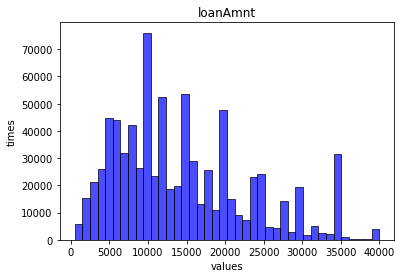

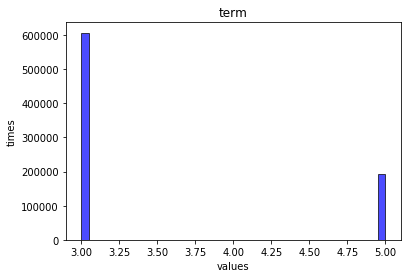

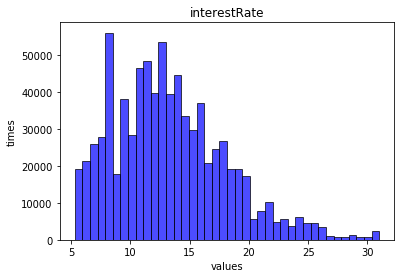

In [72]:
features = ['loanAmnt', 'term', 'interestRate']
show_hist(features)

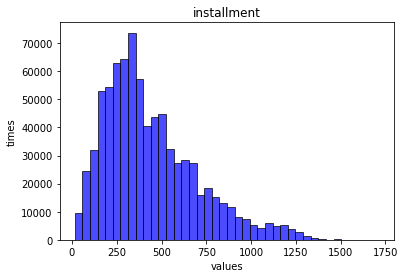

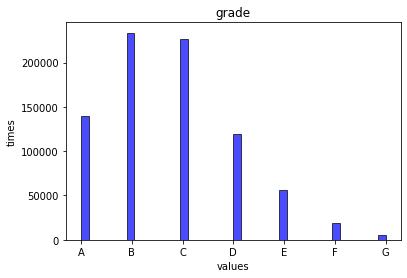

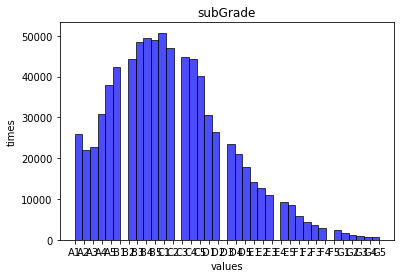

In [73]:
features = ['installment', 'grade', 'subGrade']
show_hist(features)

{nan, '3 years', '8 years', '10+ years', '< 1 year', '4 years', '6 years', '1 year', '5 years', '2 years', '7 years', '9 years'}


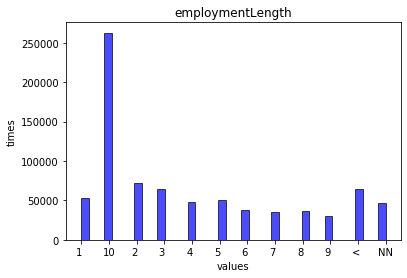

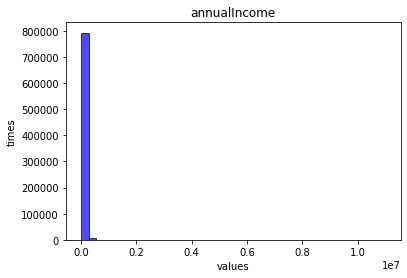

In [75]:
features = ['employmentLength', 'annualIncome']
print(set(df_raw['employmentLength'].values))
show_hist(features)

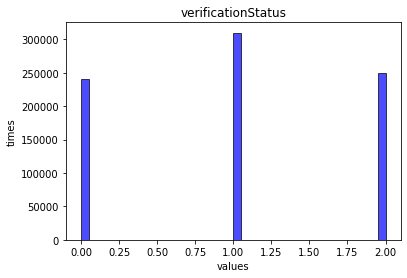

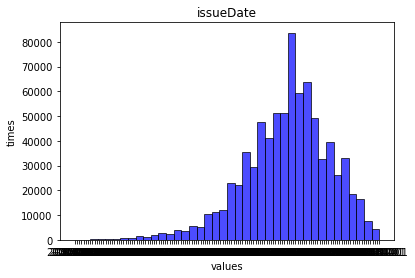

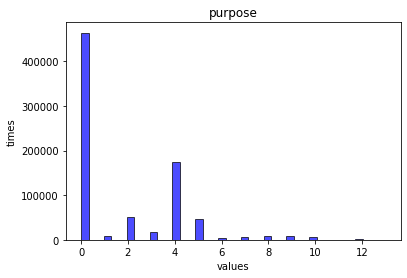

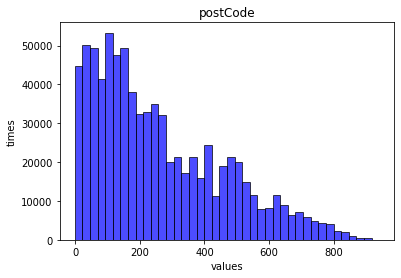

In [76]:
features = ['verificationStatus', 'issueDate', 'purpose', 'postCode']
show_hist(features)

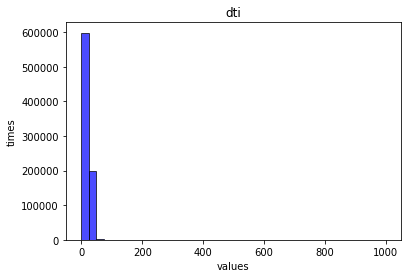

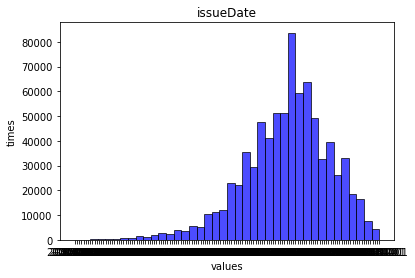

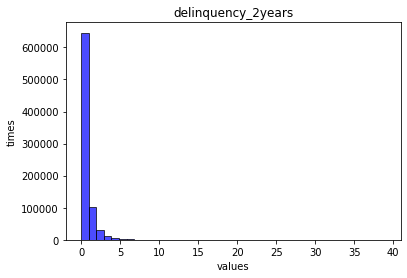

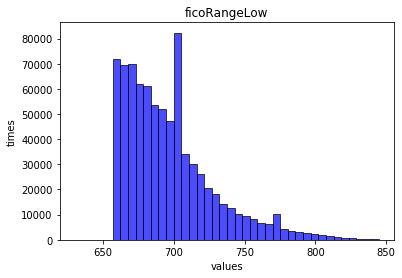

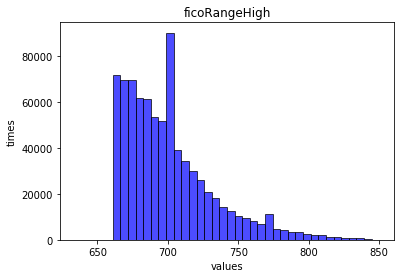

In [83]:
features = ['dti', 'issueDate', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh']
show_hist(features)

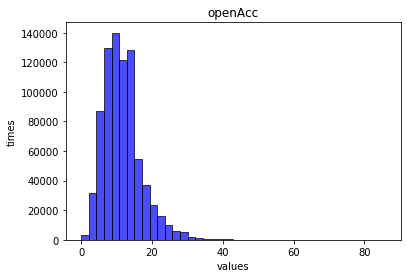

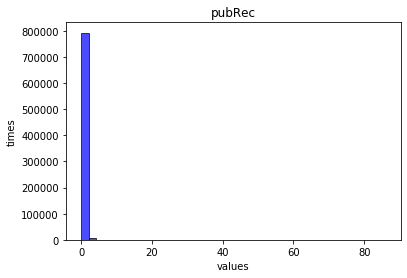

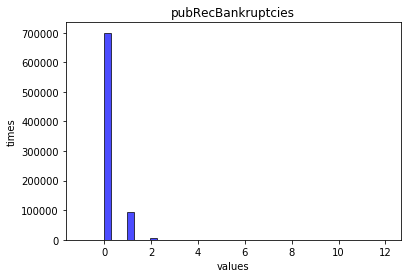

In [84]:
features = ['openAcc', 'pubRec', 'pubRecBankruptcies']
show_hist(features)

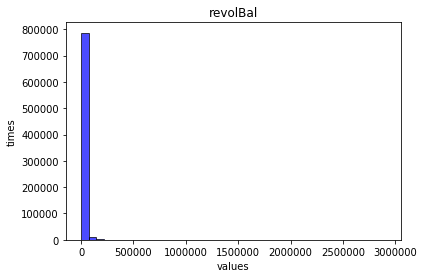

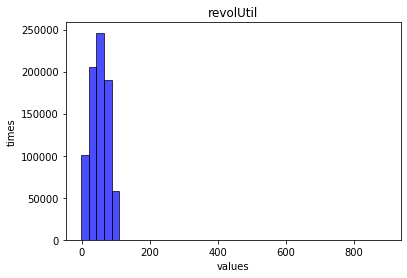

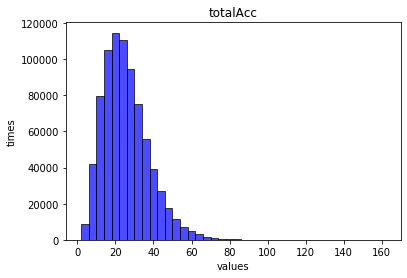

In [85]:
features = ['revolBal', 'revolUtil', 'totalAcc']
show_hist(features)

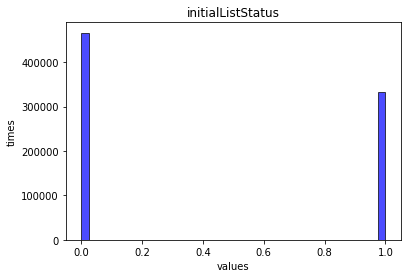

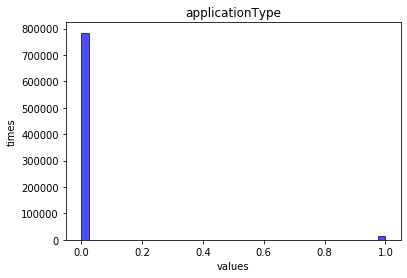

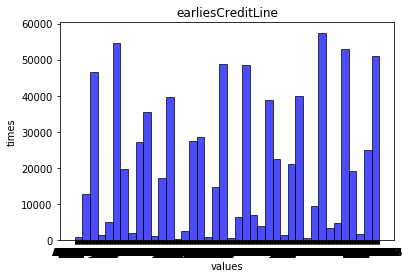

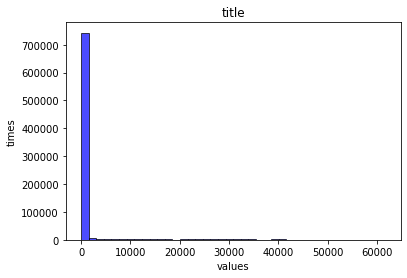

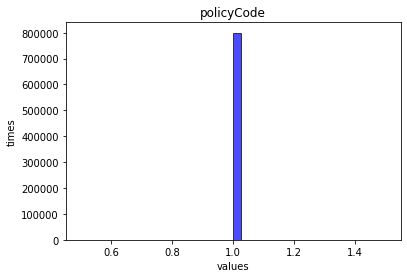

In [86]:
features = ['initialListStatus', 'applicationType', 'earliesCreditLine', 'title', 'policyCode']
show_hist(features)

In [370]:
from sklearn.ensemble import GradientBoostingClassifier


def generate_clf(learning_rate=0.25,
                 n_estimators=300,
                 max_depth=7,
                 subsample=0.8,
                 max_features=None,
                 verbose=1):
    return GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth,
                                      subsample=subsample, max_features=max_features, verbose=verbose)

In [371]:
import time
import joblib


class ModelProxy:
    clf = None

    def __init__(self, clf=None, data_link=None):
        if data_link is None:
            self.clf = clf
        else:
            self.load(data_link)

    # fit (X, y)
    def fit(self, x, y):
        t1 = time.time()
        self.clf.fit(x, y)
        t2 = time.time()
        print('train time used %d s' % (t2 - t1))

    # save model
    def save(self, store_link):
        joblib.dump(self.clf, store_link)

    # load model
    def load(self, store_link):
        self.clf = joblib.load(store_link)

    # 进行预测
    def predict(self, x):
        y = self.clf.predict(x)
        return y
    
    # 进行预测
    def predict_proba(self, x):
        y = self.clf.predict_proba(x)
        return y

In [372]:
df = df_raw_fillna.sort_values('subGrade').drop_duplicates('subGrade', keep='last')[['subGrade']]

In [373]:
subGradeList = df.values.T[0].tolist()
n = len(subGradeList)
def str2num(x):
    for i in range(n):
        if x == subGradeList[i]:
            return i + 1
    return 0

In [374]:
features_used = df_raw_fillna.columns.difference(['id', 'grade', 'earliesCreditLine', 'employmentLength', 'issueDate', 'isDefault', 'n2.2', 'n2.3'])

In [375]:
df_raw_fillna = df_raw_fillna.fillna(0)
df_raw_fillna['subGrade'] = df_raw_fillna['subGrade'].apply(str2num)
X = df_raw_fillna[features_used].values
y = df_raw_fillna['isDefault'].values

In [376]:
def get_clf(choice):
    if choice == 'GBDT':
        return generate_clf()
    elif choice == 'XGBoost':
        return generate_clf()

In [377]:
print(X[0])

[1.1000e+05 0.0000e+00 0.0000e+00 1.7050e+01 3.2000e+02 7.3400e+02
 7.3000e+02 2.0000e+00 0.0000e+00 9.1797e+02 1.9520e+01 3.5000e+04
 0.0000e+00 2.0000e+00 7.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 2.0000e+00 2.0000e+00 2.0000e+00 4.0000e+00 9.0000e+00 8.0000e+00
 4.0000e+00 1.2000e+01 2.0000e+00 7.0000e+00 1.0000e+00 1.3700e+02
 0.0000e+00 0.0000e+00 1.0000e+00 3.2000e+01 2.4178e+04 4.8900e+01
 2.2000e+01 5.0000e+00 1.0000e+00 2.7000e+01 2.0000e+00]


In [378]:
model_choice = 'GBDT'
# model_choice = 'XGBoost'

# state clf
model = ModelProxy(clf=get_clf(model_choice))
model.fit(X, y)
model.save(model_link % model_choice)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9601           0.0383           27.00m
         2           0.9381           0.0207           27.80m
         3           0.9254           0.0122           29.03m
         4           0.9156           0.0081           28.70m
         5           0.9107           0.0053           28.52m
         6           0.9060           0.0036           28.04m
         7           0.9032           0.0025           27.74m
         8           0.8998           0.0018           27.54m
         9           0.8972           0.0013           27.33m
        10           0.8957           0.0012           27.10m
        20           0.8844           0.0003           25.53m
        30           0.8764           0.0002           24.19m
        40           0.8721           0.0000           23.09m
        50           0.8677          -0.0001           22.08m
        60           0.8620          -0.0001           21.12m
       

In [379]:
from sklearn.metrics import f1_score
from sklearn import metrics

In [380]:
# evaluate model
pred_y = model.predict(X)
result = f1_score(y, pred_y)
print('total F1 = {}'.format(result))

total F1 = 0.34952185059902713


In [381]:
print((pred_y == y).sum())
print(y)
print(pred_y)

666544
[1 0 0 ... 1 0 0]
[0 0 0 ... 0 0 0]


In [382]:
pred_y_prob = model.predict_proba(X)[:, 1] 
print(pred_y_prob)

[0.34498069 0.3034774  0.45606915 ... 0.27021692 0.05128322 0.06301203]


In [383]:
fpr, tpr, thresholds = metrics.roc_curve(y, pred_y_prob)
metrics.auc(fpr, tpr)

0.8058642874763056

### 测试集

In [390]:
df_raw_test = pd.read_csv(raw_test_link)
df_raw_test['subGrade'] = df_raw_test['subGrade'].apply(str2num)
df_raw_test = df_raw_test.fillna(0)

In [391]:
# df_raw_test.isnull().any(axis=0)

In [392]:
test_X = df_raw_test[features_used].values

In [393]:
pred_y_prob = model.predict_proba(test_X)[:, 1] 
print(pred_y_prob)

[0.04831689 0.07944777 0.57678114 ... 0.22697394 0.04504423 0.028192  ]


In [394]:
id_list = df_raw_test['id'].values
num = len(id_list)

In [395]:
with open(result_link, 'w') as f:
    f.write('id,isDefault\n')
    for i in range(num):
        f.write('%d,%f\n' %(id_list[i], pred_y_prob[i]))